# QSVT Introduction

In this notebook we introduce **Quantum Singular Value Transformation (QSVT)** using simple examples supported by PennyLane’s high-level `qml.qsvt` interface.

We start with:

1. **QSVT on a scalar** — treating a real number $a$ as a block-encoded $2\times 2$ operator and applying a polynomial $f(a)$.
2. **QSVT on a diagonal matrix** — showing how QSVT transforms each eigenvalue independently.

The polynomial used throughout this notebook is:

$$ f(x) = x^2 $$

This is a perfect starting point for understanding how QSVT applies matrix functions through polynomial approximations.


In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt


## Target polynomial

We implement the simple polynomial

$$ f(x) = x^2. $$

PennyLane represents this via a list of coefficients:

$$ f(x) = c_0 + c_1 x + c_2 x^2 $$

so for $x^2$ we simply set:

- $c_0 = 0$
- $c_1 = 0$
- $c_2 = 1$

Thus the coefficient list is:

`[0, 0, 1]`


In [2]:
# Define target polynomial for QSVT
target_poly = [0, 0, 1]   # Represents f(x) = x^2


## QSVT on a Scalar

PennyLane allows us to apply QSVT to a scalar value `a` by treating it as a
block-encoded operator embedded into a single qubit.

Conceptually:
- We embed the number `a` in the top-left block of a small unitary.
- QSVT applies the polynomial transformation $f(a)$.
- We extract the top-left matrix element of the resulting unitary.

We evaluate QSVT(a) for many values of $a \in [-1, 1]$ and plot the result.


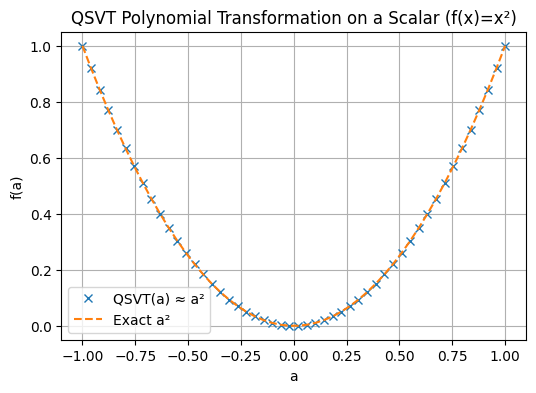

In [3]:
# Define a helper function
def qsvt_output(a):
    # qml.qsvt(a, ...) returns an operator; qml.matrix converts it to a unitary matrix
    out_matrix = qml.matrix(qml.qsvt(a, target_poly, encoding_wires=[0], block_encoding="embedding"))
    return out_matrix[0, 0]   # top-left entry corresponds to f(a)

# Scan a range of scalar values
a_vals = np.linspace(-1, 1, 50)
qsvt_vals = [np.real(qsvt_output(a)) for a in a_vals]   # imaginary part should be near zero

# Plot the results
plt.figure(figsize=(6,4))
plt.plot(a_vals, qsvt_vals, "x", label="QSVT(a) ≈ a²")
plt.plot(a_vals, a_vals**2, "--", label="Exact a²")
plt.legend()
plt.xlabel("a")
plt.ylabel("f(a)")
plt.title("QSVT Polynomial Transformation on a Scalar (f(x)=x²)")
plt.grid(True)
plt.show()


The plot should show that the QSVT output (computed via quantum polynomial
transformation) matches the classical curve $a^2$ almost exactly.

This demonstrates:

- QSVT can apply polynomial functions to eigenvalues/singular values.
- Scalars are a perfect minimal example of a single singular value.
- PennyLane's `qml.qsvt` interface handles the circuit construction internally.

Next, we apply the same polynomial transformation to the **eigenvalues of a diagonal matrix**.


## QSVT on a Diagonal Matrix

Now we consider a matrix

$$ A = \mathrm{diag}(\lambda_1, \lambda_2, \dots, \lambda_{16}) $$

with eigenvalues evenly spaced in $[-1, 1]$.

Because A is diagonal:
- its eigenvalues equal its singular values,
- QSVT should map each eigenvalue to $f(\lambda_i) = \lambda_i^2$.

PennyLane can automatically construct a block encoding of a diagonal matrix
using the `"embedding"` option.


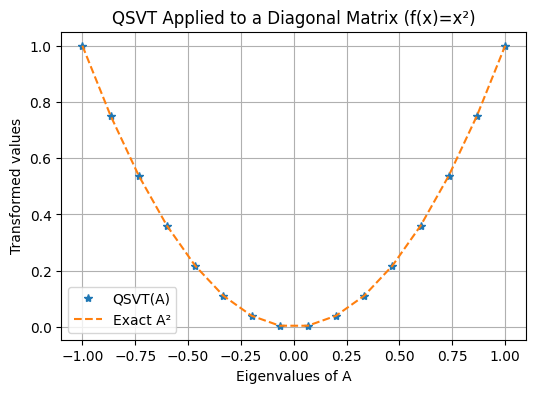

In [ ]:
# Create a simple diagonal matrix
eigvals = np.linspace(-1, 1, 16)
A = np.diag(eigvals)

# 16 eigenvalues → 4 qubits needed, plus 1 ancilla = 5 wires
wire_order = list(range(5))

# Apply QSVT to the matrix
op = qml.qsvt(A, target_poly, encoding_wires=wire_order, block_encoding="embedding")
U_A = qml.matrix(op)

# Extract the transformed eigenvalues
# (top-left 16 entries of diagonal block)
qsvt_eigs = np.real(np.diagonal(U_A))[:16]

# Plot comparison
plt.figure(figsize=(6,4))
plt.plot(eigvals, qsvt_eigs, "*", label="QSVT(A)")
plt.plot(eigvals, eigvals**2, "--", label="Exact A²")
plt.xlabel("Eigenvalues of A")
plt.ylabel("Transformed values")
plt.title("QSVT Applied to a Diagonal Matrix (f(x)=x²)")
plt.legend()
plt.grid(True)
plt.show()


Because A is diagonal, QSVT transforms each eigenvalue independently.
The plot should show that:

$$ f(\lambda_i) \approx \lambda_i^2. $$

This illustrates the core principle of QSVT:

> QSVT applies a polynomial transformation to each singular value of a block-encoded operator.

This behaviour generalises to:
- singular value filters,
- matrix inversion (HHL-like),
- matrix functions,
- Hamiltonian simulation methods.

In later notebooks, we will build more sophisticated examples including
step-function filters, matrix inversion, and non-diagonal block encodings.
